In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Users\Admin\Desktop\hr analytics\hranalyticstrain.csv')

In [3]:
test=pd.read_csv(r'C:\Users\Admin\Desktop\hr analytics\hranalyticstest.csv')

In [4]:
hr=train.append(test)

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


In [6]:
hr['education']=np.where(hr.education.isnull(),"Bachelor's",hr.education)

In [7]:
hr['education'].isnull().sum()

0

#### univariate analysis-categorical

In [8]:
hr['previous_year_rating'].isnull().sum()

5936

In [9]:
hr['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

<AxesSubplot:xlabel='previous_year_rating', ylabel='Density'>

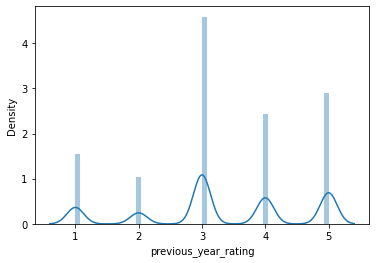

In [13]:
sns.distplot(hr['previous_year_rating'])

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Density'>

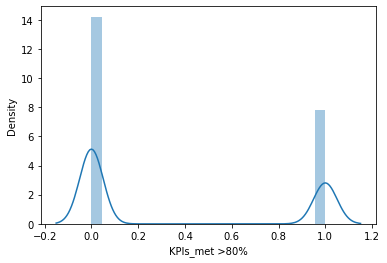

In [14]:
sns.distplot(hr['KPIs_met >80%'])

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

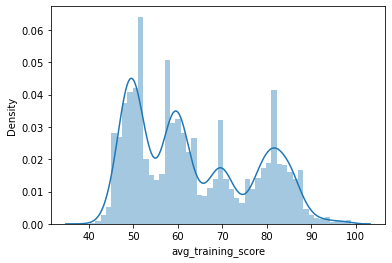

In [15]:
sns.distplot(hr['avg_training_score'])

In [16]:
hr['avg_training_score'].describe()#

count    78298.000000
mean        63.349664
std         13.383664
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [10]:
bins = [30,50,70,90,100]
labels = ['A','B','C','D']
hr['binned']= pd.cut(hr['avg_training_score'],bins=bins, labels=labels)
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,binned
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,A
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,B
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,A
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,A
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,C


In [11]:
hr['previous_year_rating']=hr['previous_year_rating'].fillna(hr['previous_year_rating'].groupby(hr['binned']).transform('mean'))

In [12]:
hr['previous_year_rating'].isnull().sum()

0

In [13]:
hr['previous_year_rating'].describe()

count    78298.000000
mean         3.331692
std          1.212819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [49]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           78298 non-null  int64   
 1   department            78298 non-null  object  
 2   region                78298 non-null  object  
 3   education             78298 non-null  object  
 4   gender                78298 non-null  object  
 5   recruitment_channel   78298 non-null  object  
 6   no_of_trainings       78298 non-null  int64   
 7   age                   78298 non-null  int64   
 8   previous_year_rating  78298 non-null  float64 
 9   length_of_service     78298 non-null  int64   
 10  KPIs_met >80%         78298 non-null  int64   
 11  awards_won?           78298 non-null  int64   
 12  avg_training_score    78298 non-null  int64   
 13  is_promoted           54808 non-null  float64 
 14  binned                78298 non-null  category
dtypes:

In [14]:
p99=np.percentile(hr.length_of_service,99.5)
p99

24.0

In [15]:
hr['length_of_service']=np.where(hr.length_of_service>p99,p99,hr.length_of_service)

In [16]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           78298 non-null  int64   
 1   department            78298 non-null  object  
 2   region                78298 non-null  object  
 3   education             78298 non-null  object  
 4   gender                78298 non-null  object  
 5   recruitment_channel   78298 non-null  object  
 6   no_of_trainings       78298 non-null  int64   
 7   age                   78298 non-null  int64   
 8   previous_year_rating  78298 non-null  float64 
 9   length_of_service     78298 non-null  float64 
 10  KPIs_met >80%         78298 non-null  int64   
 11  awards_won?           78298 non-null  int64   
 12  avg_training_score    78298 non-null  int64   
 13  is_promoted           54808 non-null  float64 
 14  binned                78298 non-null  category
dtypes:

In [17]:
hr.drop(['employee_id','region'],axis=1,inplace=True)

In [18]:
hr.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,binned
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8.0,1,0,49,0.0,A
1,Operations,Bachelor's,m,other,1,30,5.0,4.0,0,0,60,0.0,B
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7.0,0,0,50,0.0,A
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10.0,0,0,50,0.0,A
4,Technology,Bachelor's,m,other,1,45,3.0,2.0,0,0,73,0.0,C


In [19]:
hr=pd.get_dummies(hr)

In [20]:
hr.corr()#3,5,67

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,binned_A,binned_B,binned_C,binned_D
no_of_trainings,1.000000,-0.082536,-0.055656,-0.058802,-0.043912,-0.004818,0.044180,-0.024896,0.047605,0.019428,...,-0.033644,-0.084530,0.084530,0.010886,-0.014407,-0.006830,0.000176,-0.046240,0.050822,-0.001815
age,-0.082536,1.000000,0.009363,0.654415,-0.026223,-0.007357,-0.044592,-0.017166,-0.102731,-0.075176,...,0.364460,0.017816,-0.017816,0.018125,-0.041688,-0.006314,-0.007530,0.057407,-0.054303,-0.007380
previous_year_rating,-0.055656,0.009363,1.000000,0.001506,0.337851,0.027186,0.073205,0.154825,0.054891,0.031414,...,0.016745,0.023300,-0.023300,-0.015358,0.066711,-0.003617,-0.097218,0.062407,0.008981,0.050248
length_of_service,-0.058802,0.654415,0.001506,1.000000,-0.078306,-0.040737,-0.035818,-0.010482,-0.071054,-0.051470,...,0.249324,0.017747,-0.017747,0.008694,-0.029272,-0.000379,-0.001615,0.041930,-0.042759,-0.007351
KPIs_met >80%,-0.043912,-0.026223,0.337851,-0.078306,1.000000,0.100365,0.076729,0.221582,0.034518,0.025530,...,0.009671,0.037916,-0.037916,-0.007304,0.048054,-0.006385,-0.086637,0.041031,0.021332,0.056570
awards_won?,-0.004818,-0.007357,0.027186,-0.040737,0.100365,1.000000,0.072655,0.195871,0.004340,0.001776,...,0.001527,-0.000553,0.000553,0.003878,0.001372,-0.004292,-0.025310,-0.029789,0.018651,0.166087
avg_training_score,0.044180,-0.044592,0.073205,-0.035818,0.076729,0.072655,1.000000,0.181147,0.522893,-0.051006,...,0.033377,0.024840,-0.024840,0.003260,0.027166,-0.011039,-0.614004,-0.292758,0.826375,0.235106
is_promoted,-0.024896,-0.017166,0.154825,-0.010482,0.221582,0.195871,0.181147,1.000000,0.012369,-0.003109,...,0.029343,0.011109,-0.011109,-0.004879,0.018641,-0.000483,-0.086658,-0.053516,0.071358,0.293256
department_Analytics,0.047605,-0.102731,0.054891,-0.071054,0.034518,0.004340,0.522893,0.012369,1.000000,-0.072634,...,-0.057955,-0.144650,0.144650,0.003361,-0.017063,0.001495,-0.175694,-0.311872,0.493305,0.034290
department_Finance,0.019428,-0.075176,0.031414,-0.051470,0.025530,0.001776,-0.051006,-0.003109,-0.072634,1.000000,...,-0.034571,-0.016363,0.016363,0.008296,-0.028318,-0.000251,-0.117201,0.219872,-0.132998,-0.004069


In [21]:
test_cl=hr[hr['is_promoted'].isnull()]
train_cl=hr[hr['is_promoted'].notnull()]

In [22]:
train_y=train_cl["is_promoted"]
train_x=train_cl.drop("is_promoted",axis=1)
test_cl=test_cl.drop("is_promoted",axis=1)

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [27]:
lr.fit(train_x,train_y)

LogisticRegression()

In [30]:
pred_labels=lr.predict(test_cl)
pred_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
predicted=pd.concat([test_cl,pd.DataFrame(pred_labels)],axis=1)

In [32]:
predicted.to_csv("logisticoutput2.csv")

#### decisiontrees

In [33]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier.fit(train_x,train_y)


DecisionTreeClassifier()

In [35]:
y_pred=Classifier.predict(test_cl)

In [36]:
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [37]:
predicted=pd.concat([test_cl,pd.DataFrame(y_pred)],axis=1)

In [38]:
predicted.to_csv("decisiontreeoutput01.csv")

#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=20,random_state=0)
regressor.fit(train_x,train_y)

RandomForestClassifier(n_estimators=20, random_state=0)

In [51]:
y_pred=regressor.predict(test_cl)

In [52]:
predicted=pd.concat([test_cl,pd.DataFrame(y_pred)],axis=1)

In [53]:
predicted.to_csv("randomforestoutput01.csv")

In [56]:
a=[{'model':['old','decisiontree','randomforest'],'score':[0.3599,0.4267,0.651],'rank':[3057,2428,1938]}]
a

[{'model': ['old', 'decisiontree', 'randomforest'],
  'score': [0.3599, 0.4267, 0.651],
  'rank': [3057, 2428, 1938]}]

#### RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=10,random_state=0)
regressor.fit(train_x,train_y)

RandomForestClassifier(n_estimators=10, random_state=0)

In [58]:
y_pred=regressor.predict(test_cl)

In [59]:
predicted=pd.concat([test_cl,pd.DataFrame(y_pred)],axis=1)

In [60]:
predicted.to_csv("randomforestestimatorchangedoutput01.csv")

#### Randomforest2

In [63]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=25,random_state=0)
regressor.fit(train_x,train_y)

RandomForestClassifier(n_estimators=25, random_state=0)

In [67]:
y_pred=regressor.predict(test_cl)

In [68]:
predicted=pd.concat([test_cl,pd.DataFrame(y_pred)],axis=1)

In [69]:
predicted.to_csv("randomforestestimatorchangedoutput02.csv")

#### Randomforest3

In [40]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier(n_estimators=28,random_state=0)
regressor.fit(train_x,train_y)

RandomForestClassifier(n_estimators=28, random_state=0)

In [41]:
y_pred=regressor.predict(test_cl)

In [42]:
predicted=pd.concat([test_cl,pd.DataFrame(y_pred)],axis=1)

In [76]:
predicted.to_csv("randomforestestimatorchangedoutput03.csv")

## Ensembling

In [54]:
from sklearn.ensemble import VotingClassifier
mod1=LogisticRegression(random_state=1)
mod2=DecisionTreeClassifier(random_state=1)
mod3=RandomForestClassifier(random_state=1)
model=VotingClassifier(estimators=[('lr',mod1),('dt',mod2),('regressor',mod3)],voting='hard')
model.fit(train_x,train_y)
y_preds=model.predict(test_cl)
model.score(test_cl,y_preds)

1.0

In [55]:
y_preds

array([0., 0., 0., ..., 0., 0., 1.])

In [56]:
pred=pd.concat([test_cl,pd.DataFrame(y_preds)],axis=1)
pred.to_csv("ensembleoutputhranalytics2.csv")

0.9960042329586921

In [67]:
a=model.predict(train_x)
a

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
b=np.array(train_y)
b

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
model.score(a,b)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Ensemble 2

In [71]:
from sklearn.ensemble import VotingClassifier

mod1=DecisionTreeClassifier(random_state=1)
mod2=RandomForestClassifier(random_state=1)
model=VotingClassifier(estimators=[('dt',mod1),('regressor',mod2)],voting='hard')
model.fit(train_x,train_y)
y_preds2=model.predict(test_cl)


In [72]:
pred=pd.concat([test_cl,pd.DataFrame(y_preds2)],axis=1)
pred.to_csv("ensembleoutputhranalytics3.csv")

In [73]:
from sklearn.ensemble import VotingClassifier

mod1=DecisionTreeClassifier(random_state=1)
mod2=RandomForestClassifier(n_estimators=28,random_state=1)
model=VotingClassifier(estimators=[('dt',mod1),('regressor',mod2)],voting='hard')
model.fit(train_x,train_y)
y_preds3=model.predict(test_cl)

In [74]:
pred=pd.concat([test_cl,pd.DataFrame(y_preds3)],axis=1)
pred.to_csv("ensembleoutputhranalytics4.csv")

## ada boost

In [75]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=1)
model.fit(train_x,train_y)

AdaBoostClassifier(random_state=1)

In [76]:
ada=model.predict(test_cl)

In [77]:
ada

array([0., 0., 0., ..., 0., 0., 1.])

In [78]:
pred=pd.concat([test_cl,pd.DataFrame(ada)],axis=1)
pred.to_csv("adaboosthranalytics.csv")

## gradientboost

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [82]:
gb=model.predict(test_cl)
gb

array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
pred=pd.concat([test_cl,pd.DataFrame(gb)],axis=1)
pred.to_csv("gradientboosthranalytics.csv")

## xgboost

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [ ]:
# GridSearchCV()

In [ ]:
import xgboost as xgb

parameters={"learning_rate":[0.01,0.1,0.2,0.5],
            "n_estimators":[10,20,30,40,50,75,100,150,200],
            "n_jobs":[2,6,8,10],
            "max_depth":[4,6,8,10]
#             "random_state":[0]
           }

model=xgb.XGBClassifier(random_state=0)

GS_XGB=GridSearchCV(estimator=model,
                   param_grid=parameters,
                   cv=10,
                   n_jobs=-1)


# model=xgb.XGBClassifier(learning_rate=0.01,random_state=1)
GS_XGB.fit(train_x,train_y)

In [29]:
xg=model.predict(test_cl)

NotFittedError: need to call fit or load_model beforehand

In [ ]:
xg

In [88]:
pred=pd.concat([test_cl,pd.DataFrame(xg)],axis=1)
pred.to_csv("xgboosthranalytics.csv")